# Problem
<img src="data/problem_1.jpg">
<img src="data/problem_2.jpg">

# Solution

## a) Handwritten solution

In [1]:
from IPython.display import IFrame
IFrame('data/Handwritten.pdf', width=1000, height=700)

## b) Simulation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<img src="data/problem_3.jpg">

### Define system parameters

In [67]:
G = np.array(
    [
        [1  , 0.2, 0.1],          # Gain matrix
        [0.1,   2, 0.1], 
        [0.3, 0.1,   3]
])
gamma = 3                         # Minimum SINR
alpha = 1.2                       # Safety margin
sigma = 0.01                      # Noise power 

### Factorization

In [68]:
def construct_A_B(G, sigma, alpha, gamma):
    # initiate the matrix A
    A = np.zeros((3,3))
    # calculate over the non-diagonal elements
    for i in range(0,3):
        for j in range(0,3):
            if (i!=j):
                A[i][j] = alpha*gamma*G[i][j]/G[i][i]

    # initiate the matrix b
    b = np.zeros((3,1))
    # calculate all elements
    for i in range(0,3):
        b[i] = alpha*gamma*sigma/G[i][i]
        
    return A, b

In [69]:
A, b = construct_A_B(G, sigma, alpha, gamma)

### Simulation (only 100 iteration)

In [95]:
def simulate(n_iter, p_i, A, b, gamma, sigma):

    S = []
    S.append(
        [G[0][0]*p_i[0][0]/(sigma+G[0][1]*p_i[1][0]+G[0][2]*p_i[2][0]),
         G[1][1]*p_i[1][0]/(sigma+G[1][0]*p_i[0][0]+G[1][2]*p_i[2][0]),
         G[2][2]*p_i[2][0]/(sigma+G[2][0]*p_i[0][0]+G[2][1]*p_i[1][0])])

    p = []
    p.append(np.array(p_i))

    for i in range(1, n_iter):
        p_i = A @ p_i + b
        p.append(p_i)
        SINR_current = [G[0][0]*p_i[0][0]/(sigma+G[0][1]*p_i[1][0]+G[0][2]*p_i[2][0]),
                        G[1][1]*p_i[1][0]/(sigma+G[1][0]*p_i[0][0]+G[1][2]*p_i[2][0]),
                        G[2][2]*p_i[2][0]/(sigma+G[2][0]*p_i[0][0]+G[2][1]*p_i[1][0])]
        S.append(SINR_current)
        
    return p, S

In [96]:
def plot_results(n_iter, array, title, labels, ylabel):
    plt.figure(figsize=(12, 6))
    plt.plot(range(n_iter), np.array(array)[:, 0].flatten(), 'g--', linewidth=1.5, markersize=2, label=labels[0])
    plt.plot(range(n_iter), np.array(array)[:, 1].flatten(), 'r--', linewidth=1.5, markersize=2, label=labels[1])
    plt.plot(range(n_iter), np.array(array)[:, 2].flatten(), 'b--', linewidth=1.5, markersize=2, label=labels[2])
    plt.legend()
    plt.xticks(list(range(0, n_iter)))
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid
    plt.show()

In [97]:
n_iter = 20
p_i = [[0.1],[0.1],[0.1]]
labels = ['Transmitter 1', 'Transmitter 2', 'Transmitter 3']
title = 'gamma=3, initial power=[{}]'.format(p_i)

p, S = simulate(n_iter, p_i, A, b, gamma, sigma)

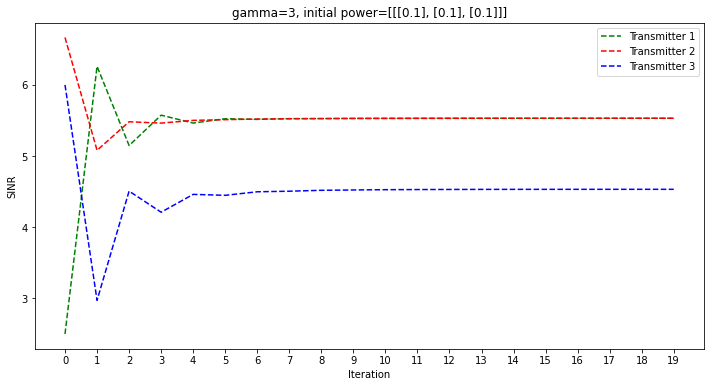

In [98]:
plot_results(n_iter, S, title, labels, 'SINR')

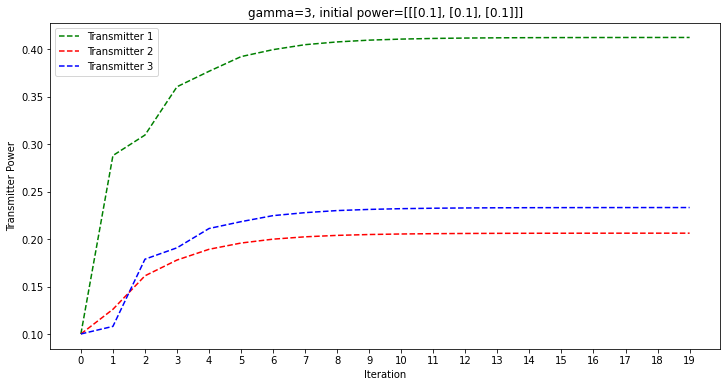

In [99]:
plot_results(n_iter, p, title, labels, 'Transmitter Power')

### Try other values

#### 1) Change initial power

In [100]:
p_i = [[0.02], [0.015], [0.1]]

In [101]:
title = 'gamma=3, initial power=[{}]'.format(p_i)

p, S = simulate(n_iter, p_i, A, b, gamma, sigma)

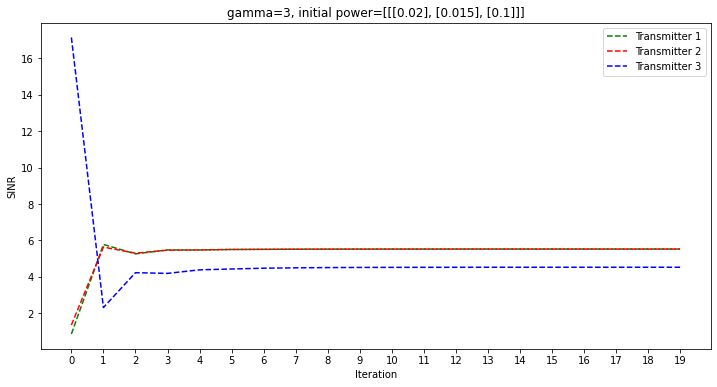

In [102]:
plot_results(n_iter, S, title, labels, 'SINR')

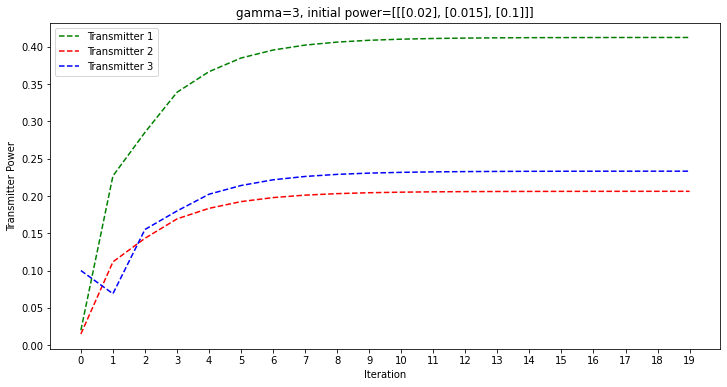

In [103]:
plot_results(n_iter, p, title, labels, 'Transmitter Power')

#### 1) Change sigma

In [104]:
A, b = construct_A_B(G, 0.05, alpha, gamma)

In [105]:
n_iter = 50
p_i = [[0.1],[0.1],[0.1]]
labels = ['Transmitter 1', 'Transmitter 2', 'Transmitter 3']
title = 'sigma=0.05, initial power=[{}]'.format(p_i)

p, S = simulate(n_iter, p_i, A, b, gamma, sigma)

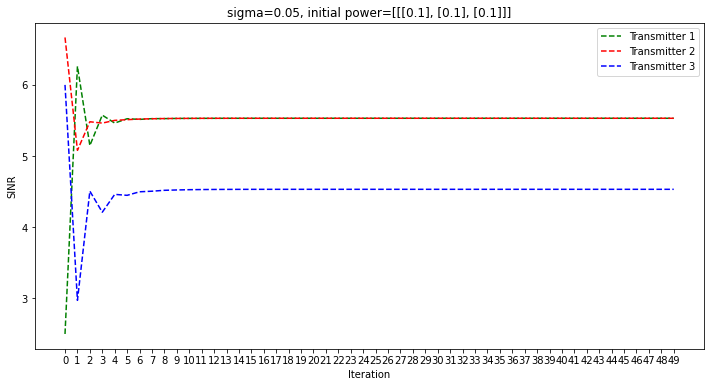

In [106]:
plot_results(n_iter, S, title, labels, 'SINR')

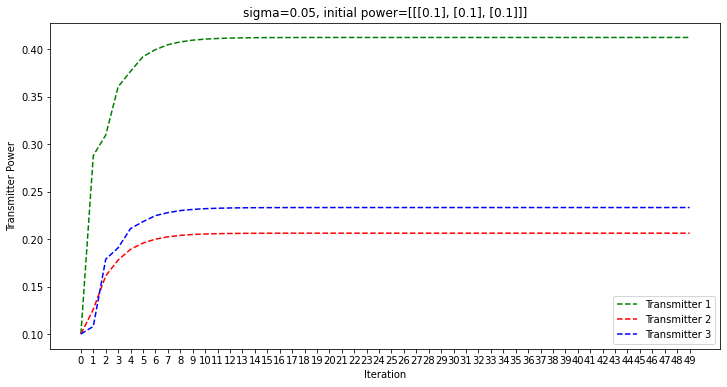

In [107]:
plot_results(n_iter, p, title, labels, 'Transmitter Power')